In [52]:
import io
import os
import json
import pandas as pd
import numpy as np
from IPython.display import Image

In [53]:
# Imports the Google Cloud client library
from google.cloud import vision

In [54]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="../ocr/igneous-stone-338706-bcdcebad51fa.json"

In [63]:
# Instantiates a client
client = vision.ImageAnnotatorClient()

# The name of the image file to annotate
file_name = os.path.abspath('../ocr/img/randos.png')

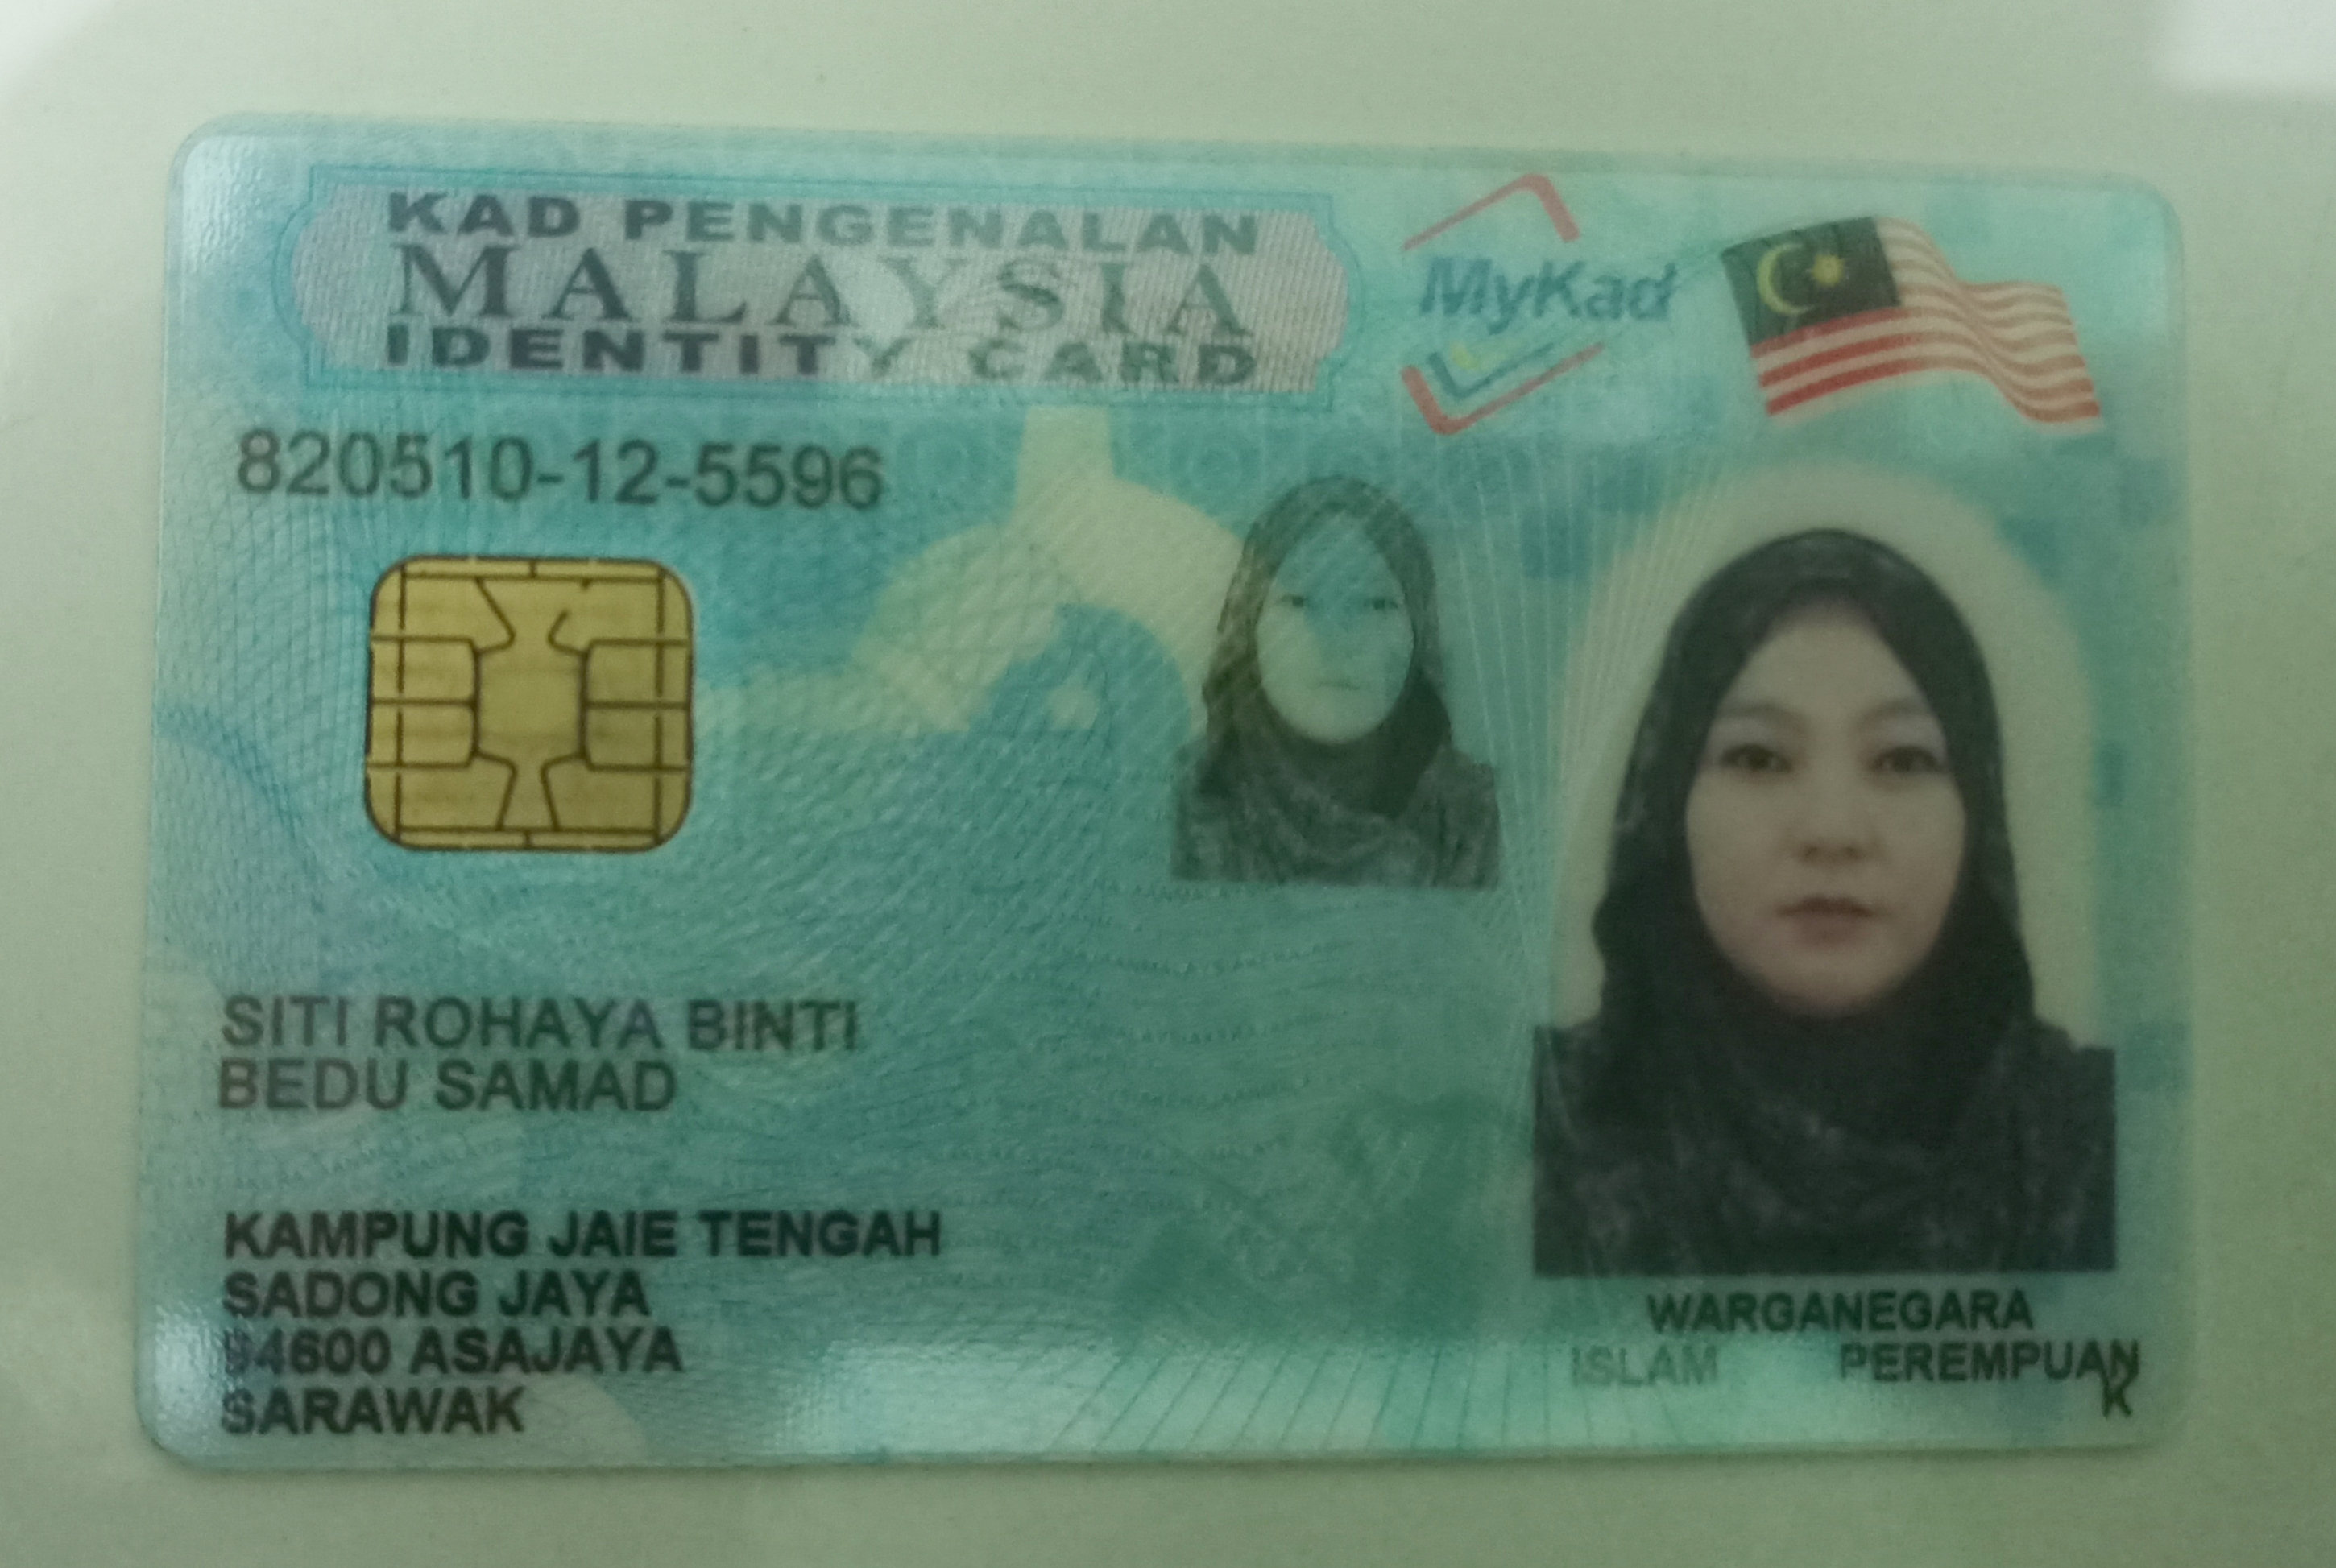

In [64]:
Image('../ocr/img/randos.png')

In [65]:
# Loads the image into memory
with io.open(file_name, 'rb') as image_file:
    content = image_file.read()

image = vision.Image(content=content)

In [66]:
# Performs label detection on the image file
response = client.label_detection(image=image)
labels = response.label_annotations

In [67]:
response = client.text_detection(image=image)    
texts = response.text_annotations  

In [68]:
response

text_annotations {
  locale: "ms"
  description: "KAD PENGENALAN\nMALAYSIA\nIDENTITY CA RD\nMyKad C\n820510-12-5596\nSITI ROHAYA BINTI\nBEDU SAMAD\nKAMPUNG JAIE TENGAH\nSADONG JAYA\n94600 ASAJAYA\nSARAWAK\nWARGANEGARA\nISLAM\nPEREMPUAN\n"
  bounding_poly {
    vertices {
      x: 274
      y: 231
    }
    vertices {
      x: 2656
      y: 231
    }
    vertices {
      x: 2656
      y: 1783
    }
    vertices {
      x: 274
      y: 1783
    }
  }
}
text_annotations {
  description: "KAD"
  bounding_poly {
    vertices {
      x: 513
      y: 231
    }
    vertices {
      x: 731
      y: 236
    }
    vertices {
      x: 729
      y: 308
    }
    vertices {
      x: 511
      y: 303
    }
  }
}
text_annotations {
  description: "PENGENALAN"
  bounding_poly {
    vertices {
      x: 783
      y: 238
    }
    vertices {
      x: 1559
      y: 257
    }
    vertices {
      x: 1557
      y: 328
    }
    vertices {
      x: 781
      y: 309
    }
  }
}
text_annotations {
  description

In [69]:
print('Texts:')    
for text in texts:        
    print('\n"{}"'.format(text.description))        
    vertices = (['({},{})'.format(vertex.x, vertex.y)                    
                for vertex in text.bounding_poly.vertices])        
    print('bounds: {}'.format(','.join(vertices))) 

Texts:

"KAD PENGENALAN
MALAYSIA
IDENTITY CA RD
MyKad C
820510-12-5596
SITI ROHAYA BINTI
BEDU SAMAD
KAMPUNG JAIE TENGAH
SADONG JAYA
94600 ASAJAYA
SARAWAK
WARGANEGARA
ISLAM
PEREMPUAN
"
bounds: (274,231),(2656,231),(2656,1783),(274,1783)

"KAD"
bounds: (513,231),(731,236),(729,308),(511,303)

"PENGENALAN"
bounds: (783,238),(1559,257),(1557,328),(781,309)

"MALAYSIA"
bounds: (484,288),(1551,313),(1548,433),(481,408)

"IDENTITY"
bounds: (506,394),(1145,407),(1143,481),(504,468)

"CA"
bounds: (1210,409),(1367,412),(1365,485),(1208,482)

"RD"
bounds: (1408,413),(1563,416),(1561,490),(1406,487)

"MyKad"
bounds: (1762,323),(2079,313),(2082,409),(1765,419)

"C"
bounds: (2134,302),(2317,296),(2320,407),(2137,413)

"820510-12-5596"
bounds: (298,532),(1099,551),(1097,637),(296,618)

"SITI"
bounds: (295,1224),(475,1225),(474,1304),(294,1303)

"ROHAYA"
bounds: (468,1237),(823,1240),(823,1304),(468,1301)

"BINTI"
bounds: (852,1240),(1063,1242),(1063,1306),(852,1304)

"BEDU"
bounds: (274,1314),(505,13

In [62]:
print('Labels:')
for label in labels:
    print(label.description)

Labels:
Font
Pattern
Writing
Brick
Rectangle
Signage
News
Handwriting
Publication
